<a href="https://colab.research.google.com/github/ayanokoji024/friendly-potato/blob/main/Iris_Dataset_ML_Lab_Assignment_1_020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Imports

In [38]:
# Imports
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from matplotlib import pyplot as plt

### Loading Iris dataset and storing it in a panda dataframe

In [39]:
iris = load_iris()
# print(iris)

df = pd.DataFrame(iris.data, columns= iris.feature_names)
df['target'] = iris.target # ground class stored in 'target' column/field of the dataframe
# 'setosa' == 0, 'versicolor' == 1, 'virginica' == 2

print(df)
print(iris.feature_names)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target  
0         0  

### Splitting the dataset into training and testing datasets

[0.9382222222222212, 0.9420754716981133, 0.9391666666666673, 0.9407352941176457, 0.9422666666666665, 0.9403614457831331, 0.942555555555555]
[30, 35, 40, 45, 50, 55, 60]


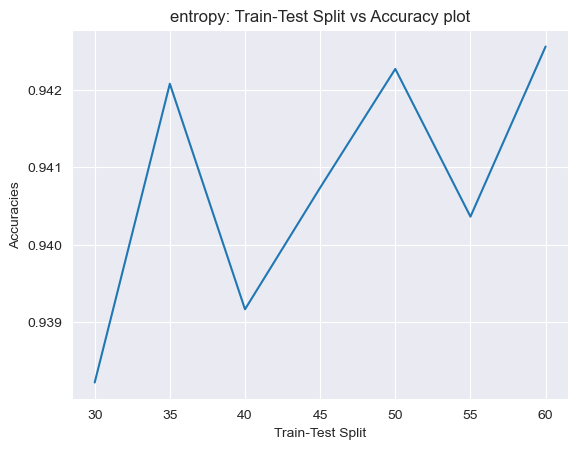

In [40]:
features = iris.feature_names # ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

X = df[features]
y = df['target']

# now we can split the dataset into training and testing dataset according to any ratio as per the 'train_test_split' function of sklearn.model_selection module:
# train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=None, test_size = 0.2)
# since we have to use the same piece of code again and again (except for different parameters),
# a function can be defined for calculating the various measures of the decision tree model for the sake of code re-usability

def decision_tree_model_iris(test_ratio, X, y, criterion_string="entropy"):


  train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=None, test_size = test_ratio)
  decision_tree_model = DecisionTreeClassifier(random_state=0, max_depth = 4, criterion=criterion_string)
  decision_tree_model.fit(train_X, train_y)

  pred_y = decision_tree_model.predict(test_X)
  print("Classification report for decision tree model:\n")
  print(classification_report(y_true = test_y, y_pred=pred_y))
  cm = confusion_matrix(test_y, pred_y)
  print(cm)

  fig, ax = plt.subplots(figsize=(8, 6))
  cm_display = (ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=decision_tree_model.classes_))
  cm_display.plot(ax=ax, cmap='YlGn', values_format='d')

  # Add a title and labels
  ax.set_title('Confusion Matrix')
  ax.set_xlabel('Predicted Label')
  ax.set_ylabel('True Label')

  # Adjust the layout to avoid overlapping
  plt.tight_layout()
  # Show the Confusion Matrix
  plt.show()

  # Create a figure and axis for the decision tree plot
  fig, ax = plt.subplots(figsize=(12, 8))

  # Plot the decision tree
  tree.plot_tree(decision_tree_model, feature_names=features, class_names=['setosa','versicolor','virginica'], filled=True, rounded=True, ax=ax)

  # Add a title
  ax.set_title('Decision Tree Plot')

  # Adjust the layout to avoid overlapping
  plt.tight_layout()

  # Show the decision tree plot
  plt.show()

def split_plot_function_decision_tree_iris(start_split=30, end_split=60, criterion="entropy"):
  accuracies = []
  split_values = []
  for i in range(start_split,end_split+1, 5):
    split_values.append(i)
    acc = 0
    for j in range(0,100):
      train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=None, test_size = i/100)
      decision_tree_model = DecisionTreeClassifier(random_state=0, max_depth = 4, criterion=criterion)
      decision_tree_model.fit(train_X, train_y)
      pred_y = decision_tree_model.predict(test_X)
      acc += accuracy_score(test_y, pred_y)
    acc/=100
    accuracies.append(acc)
  print(accuracies)
  print(split_values)

  data = pd.DataFrame(list(zip(accuracies, split_values)), columns=['Accuracies','Train-Test Split'])
  sns.lineplot(data=data, y='Accuracies', x='Train-Test Split').set_title(criterion + ": Train-Test Split vs Accuracy plot")

split_plot_function_decision_tree_iris()

For test-train ratio of 0.2 to 0.8
Classification report for decision tree model:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.80      0.89      0.84         9
           2       0.90      0.82      0.86        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30

[[10  0  0]
 [ 0  8  1]
 [ 0  2  9]]


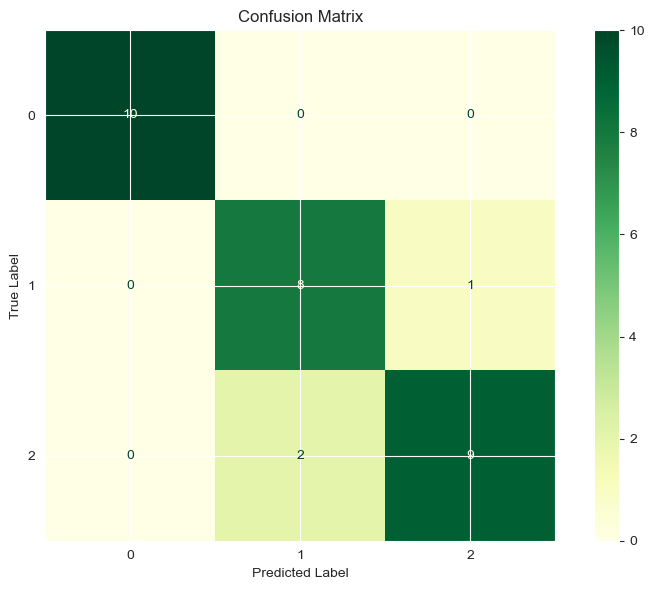

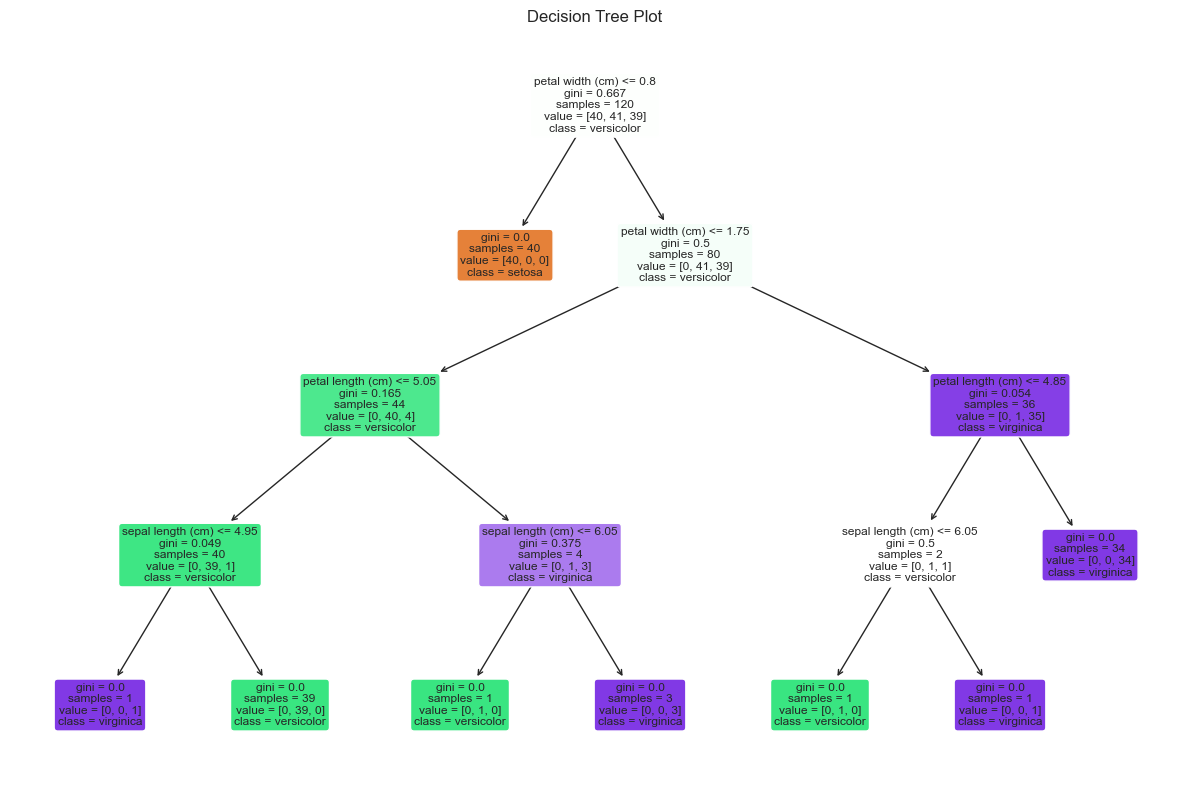

In [41]:
print("For test-train ratio of 0.2 to 0.8")
decision_tree_model_iris(0.2,X,y,"gini")



For test-train ratio of 0.3 to 0.7
Classification report for decision tree model:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.93      0.93      0.93        15
           2       0.91      0.91      0.91        11

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45

[[19  0  0]
 [ 0 14  1]
 [ 0  1 10]]


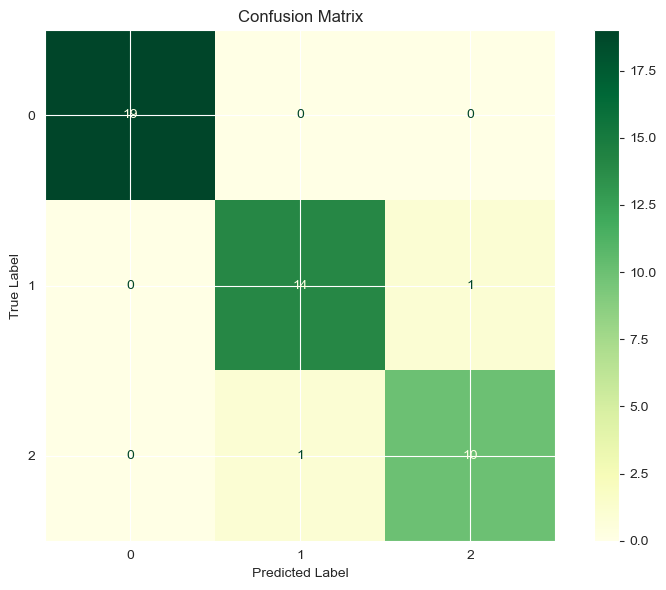

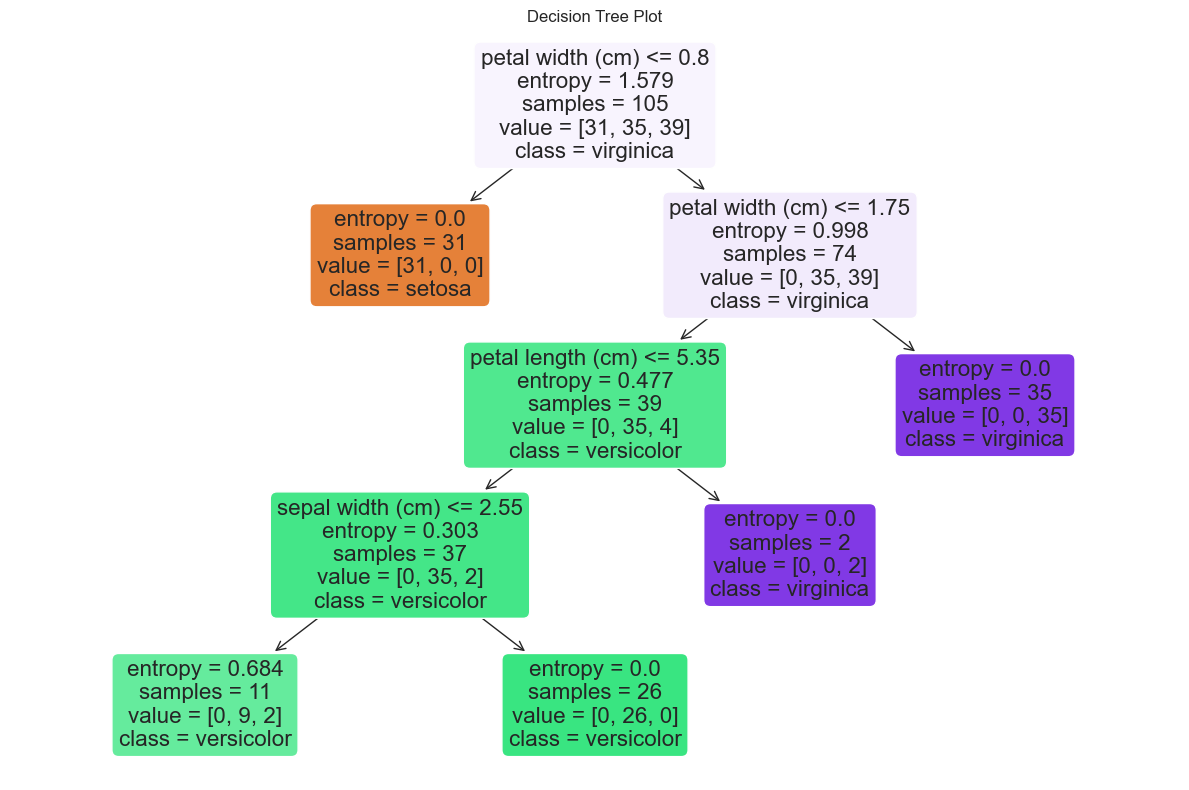

In [42]:
print("\nFor test-train ratio of 0.3 to 0.7")
decision_tree_model_iris(0.3,X,y)



For test-train ratio of 0.4 to 0.6
Classification report for decision tree model:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        22

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

[[24  0  0]
 [ 0 14  0]
 [ 0  0 22]]


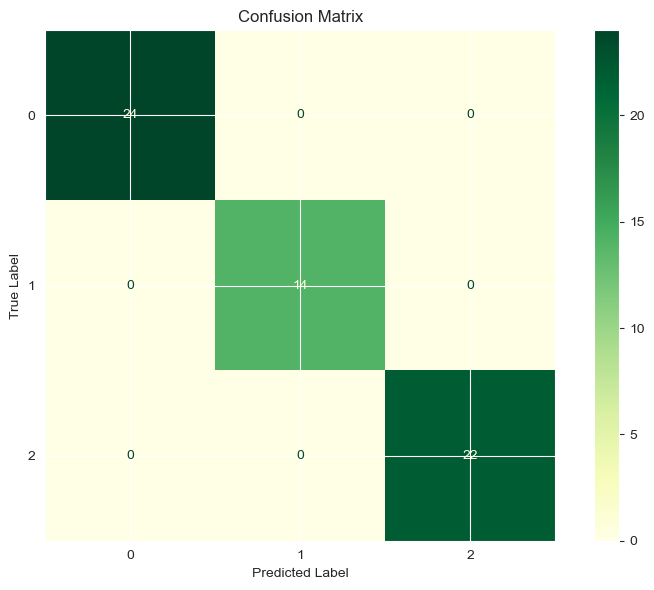

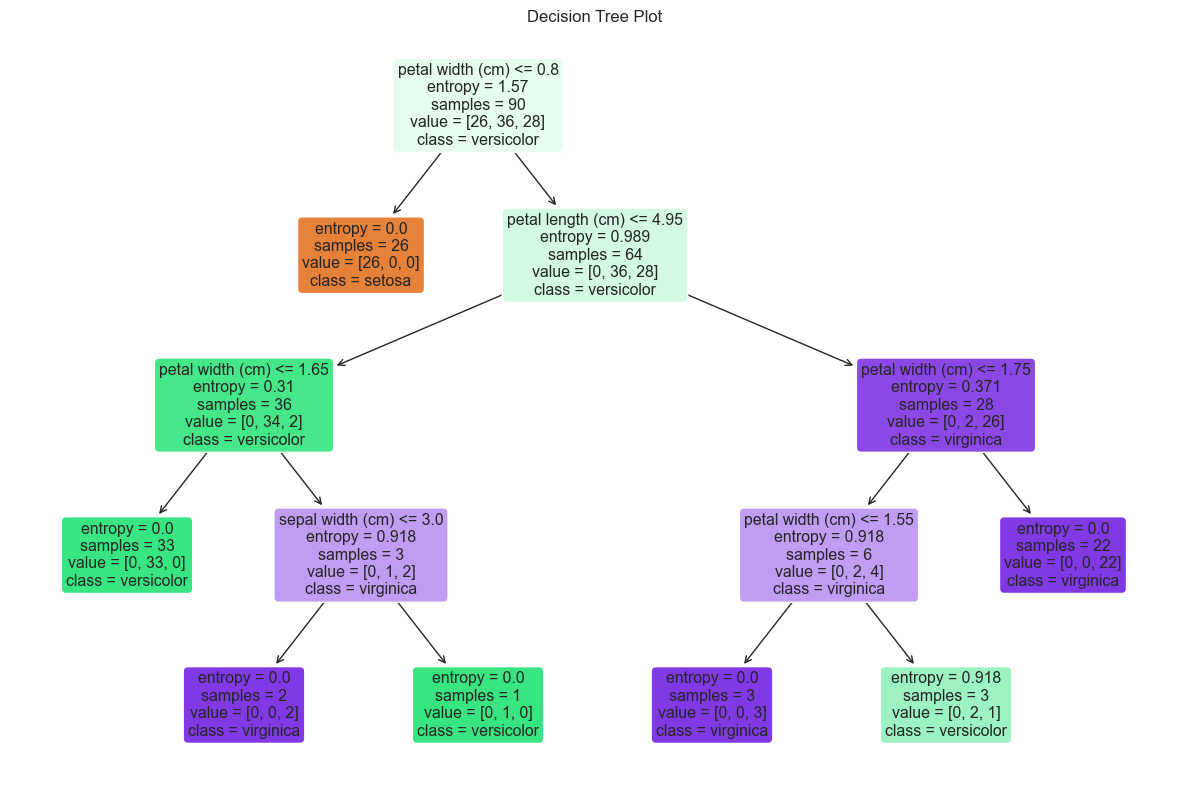

In [43]:
print("\nFor test-train ratio of 0.4 to 0.6")
decision_tree_model_iris(0.4,X,y)

### Naive Bayes

In [56]:
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

def multinomialNB_model_iris(test_ratio, X, y, alpha=1e-6):
  train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=None, test_size = test_ratio)
  model = MultinomialNB(alpha=alpha)
  model.fit(train_X, train_y)

  pred_y = model.predict(test_X)
  print("Classification report for Multinomial Naive Bayes model:\n")
  print(classification_report(y_true = test_y, y_pred=pred_y))
  cm = confusion_matrix(test_y, pred_y)
  print(cm)

  fig, ax = plt.subplots(figsize=(8, 6))
  cm_display = (ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_))
  cm_display.plot(ax=ax, cmap='YlGn', values_format='d')

  # Add a title and labels
  ax.set_title('Confusion Matrix')
  ax.set_xlabel('Predicted Label')
  ax.set_ylabel('True Label')

  # Adjust the layout to avoid overlapping
  plt.tight_layout()
  # Show the Confusion Matrix
  plt.show()

def gaussianNB_model_iris(test_ratio, X, y, smooth = 1e-9):
  train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=None, test_size = test_ratio)
  model = GaussianNB(var_smoothing=smooth)
  model.fit(train_X, train_y)

  pred_y = model.predict(test_X)
  print("Classification report for Gaussian Naive Bayes model:\n")
  print(classification_report(y_true = test_y, y_pred=pred_y))
  cm = confusion_matrix(test_y, pred_y)
  print(cm)

  fig, ax = plt.subplots(figsize=(8, 6))
  cm_display = (ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_))
  cm_display.plot(ax=ax, cmap='YlGn', values_format='d')

  # Add a title and labels
  ax.set_title('Confusion Matrix')
  ax.set_xlabel('Predicted Label')
  ax.set_ylabel('True Label')

  # Adjust the layout to avoid overlapping
  plt.tight_layout()
  # Show the Confusion Matrix
  plt.show()

def bernoulliNB_model_iris(test_ratio, X, y,alpha=1e-6,binarize=1.8):
  train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=None, test_size = test_ratio)
  scaler = StandardScaler()
  train_X = scaler.fit_transform(train_X)
  test_X = scaler.transform(test_X)

  model = BernoulliNB(alpha=alpha,binarize=binarize,fit_prior=True,class_prior=None)
  model.fit(train_X, train_y)

  pred_y = model.predict(test_X)
  print("Classification report for Bernoulli Naive Bayes model:\n")
  print(classification_report(y_true = test_y, y_pred=pred_y))
  cm = confusion_matrix(test_y, pred_y)
  print(cm)

  fig, ax = plt.subplots(figsize=(8, 6))
  cm_display = (ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_))
  cm_display.plot(ax=ax, cmap='YlGn', values_format='d')

  # Add a title and labels
  ax.set_title('Confusion Matrix')
  ax.set_xlabel('Predicted Label')
  ax.set_ylabel('True Label')

  # Adjust the layout to avoid overlapping
  plt.tight_layout()
  # Show the Confusion Matrix
  plt.show()

Classification report for Multinomial Naive Bayes model:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.62      1.00      0.77        10
           2       1.00      0.54      0.70        13

    accuracy                           0.80        30
   macro avg       0.88      0.85      0.82        30
weighted avg       0.88      0.80      0.79        30

[[ 7  0  0]
 [ 0 10  0]
 [ 0  6  7]]


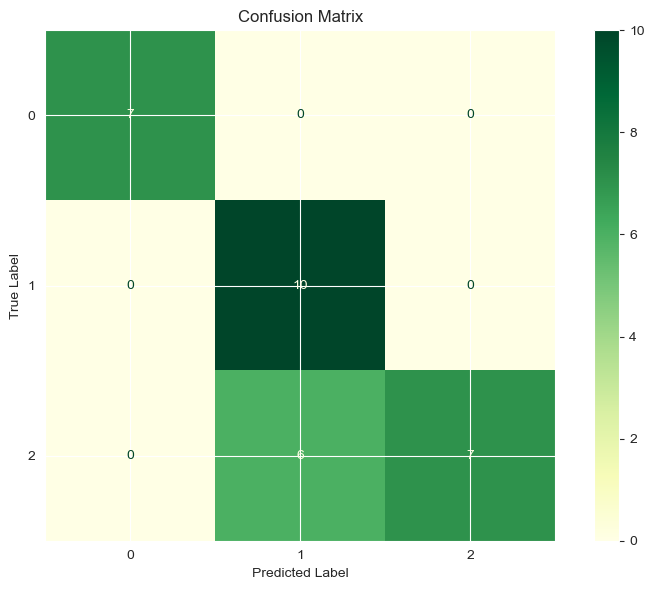

In [53]:
multinomialNB_model_iris(0.2,X,y)

Classification report for Gaussian Naive Bayes model:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        16

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

[[17  0  0]
 [ 0 12  0]
 [ 0  0 16]]


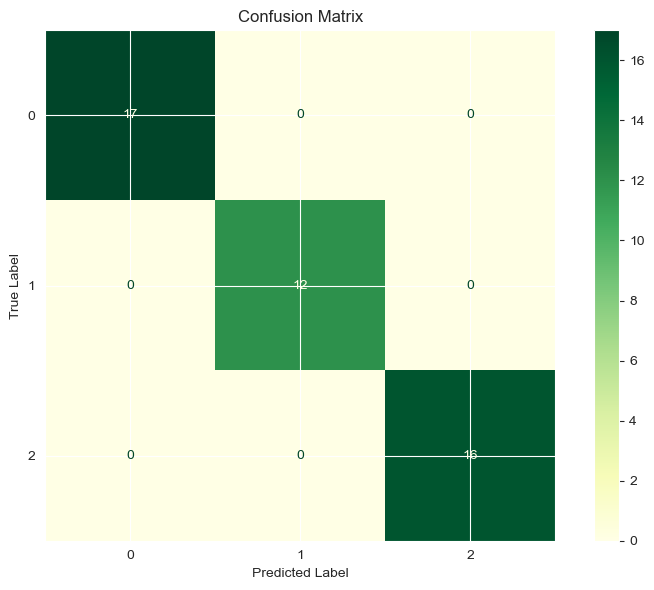

In [54]:
gaussianNB_model_iris(0.3,X,y)

Classification report for Bernoulli Naive Bayes model:

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       0.80      0.44      0.57         9
           2       0.69      0.90      0.78        10

    accuracy                           0.80        30
   macro avg       0.80      0.78      0.77        30
weighted avg       0.81      0.80      0.78        30

[[11  0  0]
 [ 1  4  4]
 [ 0  1  9]]


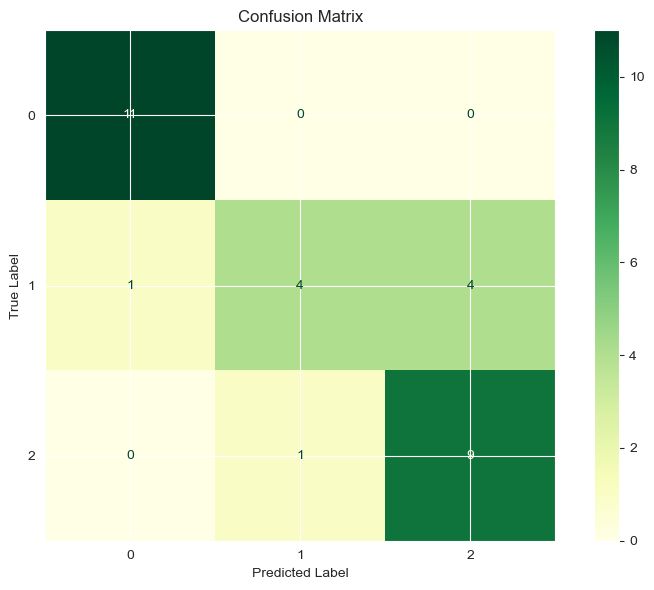

In [83]:
bernoulliNB_model_iris(0.2,X,y,alpha=1,binarize=0.0)